In [9]:
pip install sqlalchemy psycopg2 python-dotenv

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 938.5 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.7 MB 1.0 MB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 1.6 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 1.7 MB/s  0:00:01

   -------------------- ------------------- 1/2 [psycopg2]
   ---------------------------------------- 2/2 [psycopg2]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Lili\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
from sqlalchemy import create_engine 
import os 
from dotenv import load_dotenv

In [2]:
purchase_df = pd.read_csv("purchase_info.csv")

In [3]:
transaction_df = pd.read_excel("transaction_info.xlsx")

In [12]:
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
import pandas as pd 
from sqlalchemy import create_engine 
import os 
from dotenv import load_dotenv

In [7]:
engine= create_engine(database_url)

In [8]:
purchase_df.to_sql('purchase_info', engine, if_exists='append', index=False, schema = 'cust_data')

637

In [9]:
transaction_df.to_sql('transaction_info', engine, if_exists='append', index=False, schema ='cust_data')

836

### Getting data from DB

In [32]:
import pandas as pd 
from sqlalchemy import create_engine 
import os 
from dotenv import load_dotenv

### Connect to DB engine

In [10]:
engine = create_engine(database_url)

In [11]:
p_query = '''select * from cust_data.purchase_info pd;'''

In [12]:
purchase_df = pd.read_sql(p_query, con=engine)

In [13]:
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [14]:
t_query = '''select * from cust_data.transaction_info td;'''

In [15]:
transaction_df = pd.read_sql(t_query, con=engine)

In [16]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Checking for missing values

In [17]:
transaction_df.isna().sum() 

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [18]:
purchase_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## No of records##

In [19]:
transaction_df.shape 

(529672, 8)

In [20]:
purchase_df.shape

(145274, 3)

## removing duplicates

In [21]:
transaction_df= transaction_df.drop_duplicates()

In [22]:
purchase_df= purchase_df.drop_duplicates()

###Fix data types

In [23]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264835 non-null  datetime64[ns]
 1   STORE_NBR       264835 non-null  int64         
 2   LYLTY_CARD_NBR  264835 non-null  int64         
 3   TXN_ID          264835 non-null  int64         
 4   PROD_NBR        264835 non-null  int64         
 5   PROD_NAME       264835 non-null  object        
 6   PROD_QTY        264835 non-null  int64         
 7   TOT_SALES       264835 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


In [24]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


## Extract month and year. Add column(year, month)

In [25]:
transaction_df['YEAR'] = transaction_df['DATE'].dt.year

In [49]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018


In [26]:
transaction_df['MONTH'] = transaction_df['DATE'].dt.month

### Merging the two tables

In [27]:
merged_df = transaction_df.merge(purchase_df, on='LYLTY_CARD_NBR', how='left')

In [28]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,MIDAGE SINGLES/COUPLES,Budget


In [29]:
merged_df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
YEAR                0
MONTH               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

####BASIC DATA ANALYSIS
1. Top 10 most purchased products
2. Total sales by customers life stage
3. Average spend per customer category

In [30]:
top_products = (merged_df.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10))

In [55]:
top_products

PROD_NAME
Dorito Corn Chp     Supreme 380g            6509
Kettle Mozzarella   Basil & Pesto 175g      6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Tostitos Splash Of  Lime 175g               6234
Tyrrells Crisps     Ched & Chives 165g      6227
Kettle 135g Swt Pot Sea Salt                6212
Infuzions Thai SweetChili PotatoMix 110g    6206
Thins Potato Chips  Hot & Spicy 175g        6185
Name: PROD_QTY, dtype: int64

In [31]:
sales_by_lifestage = (merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False))

In [57]:
sales_by_lifestage

LIFESTAGE
OLDER SINGLES/COUPLES     402420.75
RETIREES                  366470.90
OLDER FAMILIES            353767.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64

### Data Analysis - EDA
1. TIME SERIES ANALYSIS
2. STORE PERFORMENCE
3. PRODUCT PERFORMENCE
4. CUSTOMER BEHAVIOUR

In [32]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,MIDAGE SINGLES/COUPLES,Budget


In [33]:
merged_df['MONTH_NAME'] = merged_df['DATE'].dt.month_name()

In [36]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'YEAR', 'MONTH', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'MONTH_NAME'],
      dtype='object')

In [37]:
year=merged_df['YEAR']
type(year.head())

pandas.core.series.Series

In [35]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,YOUNG SINGLES/COUPLES,Premium,October
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,MIDAGE SINGLES/COUPLES,Budget,May
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,MIDAGE SINGLES/COUPLES,Budget,May
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,MIDAGE SINGLES/COUPLES,Budget,August
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,MIDAGE SINGLES/COUPLES,Budget,August


In [42]:
monthly_sales = (merged_df.groupby(['YEAR', 'MONTH_NAME'])['TOT_SALES'].sum().reset_index().sort_values(['YEAR', 'MONTH_NAME']))

In [43]:
monthly_sales

,YEAR,MONTH_NAME,TOT_SALES
0,2018,August,158731.05
1,2018,December,167913.40
2,2018,July,165275.30
3,2018,November,160233.70
4,2018,October,164409.70
5,2018,September,160522.00
6,2019,April,159845.10
7,2019,February,150665.00
8,2019,January,162642.30
9,2019,June,160538.60


### Store performence
1. Total Sales

In [46]:
store_sales = (merged_df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10))

In [47]:
store_sales

STORE_NBR
226    18905.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64

### Product performence
1. Most profitable product

In [48]:
top_products = (merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10))

In [49]:
top_products

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64

### Searborn -- Visualize

In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 5.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 3.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 3.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 3.3 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 3.3 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 3.5 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 3.0 MB/s eta 0:00:01
   --------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Lili\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


.reset_index = trun series into a data frame
For plotting purposes

In [51]:
import seaborn as sns

<Axes: xlabel='TOT_SALES', ylabel='PROD_NAME'>

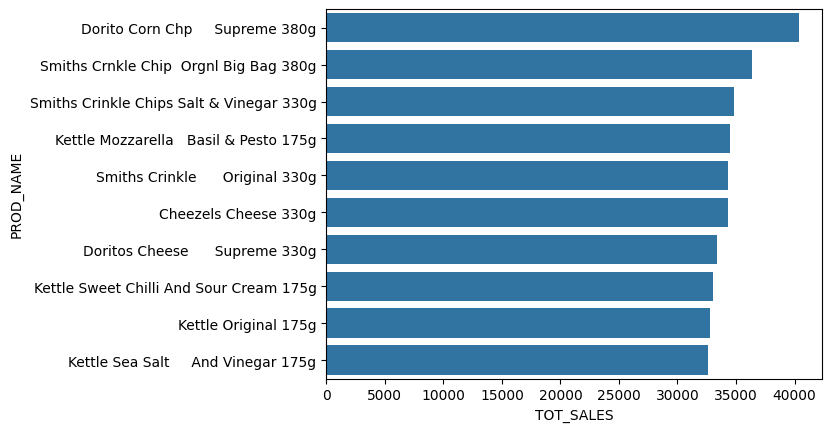

In [52]:
sns.barplot(data=top_products.reset_index(), x='TOT_SALES', y='PROD_NAME')

### Customer Behaviour
1. Which life stage buys the largest quantity

In [56]:
q_lifestage = (merged_df.groupby('LIFESTAGE')['PROD_QTY'].sum().sort_values(ascending=False))

In [57]:
q_lifestage.reset_index()

,LIFESTAGE,PROD_QTY
0,OLDER SINGLES/COUPLES,104201
1,OLDER FAMILIES,94992
2,RETIREES,94166
3,YOUNG FAMILIES,84561
4,YOUNG SINGLES/COUPLES,66634
5,MIDAGE SINGLES/COUPLES,47721
6,NEW FAMILIES,12847
